# 웹 데이터 수집

* Last updated: 20170401 20161004

## 1.1 학습내용

### 1.1.1 목표

* 웹에서 가져온 페이지를 파싱할 수 있다.
* 웹페이지에서 xpath, css selector를 사용하여 데이터를 추출할 수 있다.

### 1.1.2 목차

* 1.2 Parsing
* 1.3 javascript console
* 1.4 dom 
* 1.5 regex
* 1.6 xpath
* 1.7 css selectors
* 1.8 headers
* 1.8.1 HTTP Request(s)
* 1.8.2 HTTP Response(s)
* 1.8.3 user agent
* 1.8.4 methods

### 1.1.3 문제

* 웹데이터-1: python.org 페이지를 크롤링해서 http url를 출력하기
    * regex
    * xpath
    * css selector
* 웹데이터-3: wiki에서 'python'으로 검색해서 http url을 출력하기
    * REST GET 사용하기
    * 구글에서 검색하기
    * 위키에서 검색하기
    * 위키에서 css selector
* 웹데이터-4: 한국 포털사이트에서 노래 제목을 검색해서 가져오기
    * regex
    * lxml css selector - 노래제목, 아티스트, 앨범 출력
* 웹데이터-5: 국제학회 목록을 크롤링하기
    * lxml css.selector
    * Scrapy에서 연속 추출
* 웹데이터-6: 한국 프로야구 기록을 크롤링하기
    * kbreport.com
    * regex 단순 문자열 검색
    * xpath
* 웹데이터-7: 프리미어리그 경기결과를 크롤링하기
    * css


### 1.1.4 연습

* 연습 웹데이터-1: UC Irvine 기계학습 데이터
* 연습 웹데이터-2: 기상청 도별 날씨 가져오기기
* 연습 웹데이터-3: 신문 크롤링 해보기
* 연습 웹데이터-4: 영화 리뷰의 분석
* 한글 https://wiki.python.org/moin/PrintFails

## 1.2 Parsing

* 웹데이터는 '문자열'이다. 특정 tag를 추출하는 것이 매우 불편한다.
* ```<h1>...</h1>```은 부등호문자,h,1으로 구성된 시작-끝 tag를 찾아야 한다.
* 문자열은 tag구조를 가지고 있지만, tag가 아니라 '문자열'이라서 tree구조를 만들어야 한다는 점에 유의한다.
* parsing을 하면, 이런 tag 요소를 분리하고, tree구조로 만들어 분석을 용이하게 할 수 있다.
* HTML DOM, XML, json은 tree 구조를 가지고, 특정 요소를 선택할 수 있다.

* 파싱하는 단계는 다음과 같다.
    * 단계 1: 사용할 라이브러리를 준비한다.
```
import lxml.etree
```

    * 단계 2: html 페이지를 가져온다 (메모리 또는 파일로 저장)
    * 단계 3: 가져온 페이지를 파싱하고, 트리를 생성한다 (태그로 변환).
```
tree=lxml.etree.parse('my.html')
root=tree.getroot()
```

    * 단계 4: 트리에서 필요한 요소 selector를 정한다.
    * 단계 5: 필요한 요소를 가져온다.
```
root.getiterator():
또는
tree.xpath() 또는 tree.css()
```

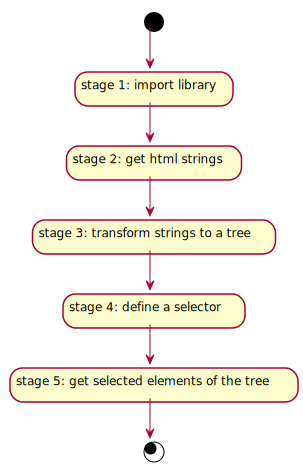

In [2]:
%%plantuml
@startuml
(*)--> "stage 1: import library"
--> "stage 2: get html strings"
--> "stage 3: transform strings to a tree"
--> "stage 4: define a selector"
--> "stage 5: get selected elements of the tree"
-->(*)
@enduml

* parsing 라이브러리
    * HTMLParser - Python에서 기본으로 제공
    * BeautifulSoup - lxml을 사용해서 구현된 parser (does not support XPath expressions.)
    * pyquery - jquery와 같은 기능의 라이브러리
    * curl - Terminal에서 사용하는 명령어
    * lxml - is written in C and thus faster than bs. xml and html parser
    * regex - tree를 만들지 않는다. 패턴으로 parsing.
    * scrapy
        * full framework
        * use pipelines
        * use for a big project. (for a small project, use requests,lxml or BeautifulSoup

구분 | 라이브러리 | 설명
-----|-----|-----
웹데이터 가져오기 | urllib, requests, curl | 웹페이지 열고, http request(s), http response(s)
웹데이터 파싱 | HTMLParser, BeautifulSoup, lxml, regex | 문자열 또는 xml, json을 파싱
프레임워크 | scrapy (java nutch, crawler4j) | 큰 프로젝트에 사용


## 1.3 Javascript console

* Chrome개발자 도구 사용하기 https://developers.google.com/web/tools/chrome-devtools/console/
* 브라우저에서 Javascript concole 창 열기

브라우저 | 콘솔창
-----|-----
Chrome | 브라우저 우측 상단 메뉴 > More tools > Developer Tools 또는 F12
Internet Explorer | F12
Firefox | Tools > Web Developer > Inspector
Safari | advanced preferences > enable Develop menu

* Javascript console 창에서 앞 mypage1.html 이용해서 연습

단축키 | 설명
-----|-----
\$x('xpath') | XPath와 일치하는 요소의 배열을 반환
\$('selector') | CSS 선택기와 일치하는 첫 번째 요소를 반환, document.querySelector()의 단축
\$$('selector all') | CSS 선택기와 일치하는 모든 요소의 배열을 반환, document.querySelectorAll()의 단축



선택 | xpath | css
-----|-----|-----
title태그 선택 | ```$x('//head/title') 또는 $x('//title')``` | ```$$('title')```
선택의 결과가 복수인 경우, 배열이 반환 | ```$x('//head/title')[0]``` | ```$$('title')[0]```
태그의 문자열을 추출 | ```$x('//head/title')[0].innerText``` | ```$$('title')[0].innerText```
       


* 'Elements' 메뉴에서 xpath 또는 selector를 찾는 방법
    * 콘솔창에서 -> element
        * html tag를 누르면 맨 앞 '...'가 생김
        * 이것을 누르면 팝업메뉴가 뜬다. 그리고 copy > xpath(또는 selector)를 선택하여 복사
    * 또는 '검색'창을 열어서 찾고자 하는 문자열, xpath, selector를 입력한다.


## 1.4 dom

* HTML은 브라우저에서 tree구조로 변환된다. 이를 DOM (Document Object Model)이라고 한다.
* HTML, XHTML, XML 문서를 계층구조인 트리구조로 만들어, 각 노드를 오브젝트로 사용하는 API.
* dom에서의 css selector 특정 요소 선택해 보기
    * dom의 querySelector()를 사용한다.
        * 아래 '.my'라는 클래스를 선택한다.
    * dom의 getElementById()를 사용한다.
        * 아래 '.p2'라는 클래스를 선택한다.

In [7]:
%%HTML
<html>
<body>
<h2 class="my">Turn this into blue</h2>
<button onclick="myFunction()">Click</button>
<script>
    function myFunction() {
        document.querySelector(".my").style.backgroundColor = "blue";
    }
</script>
</body>
</html>

* HTML javascript DOM
    * style of a ```<p>``` element

In [6]:
%%HTML
<html>
<body>
    <p id="p2">Hello World!</p>
    <script>
        document.getElementById("p2").style.color = "RED";
    </script>
    <p>Hello World turned into RED!</p>
</body>
</html>

## 1.5 regex

* 정규식 regular expression은 문자열로 표현한 정규표현으로, 패턴매칭에 사용한다.
* 정규식을 사용하면 복잡한 패턴을 단순하게 처리


정규식 | 설명 | 예
-----|-----|-----
() | grouping | (\d{1,2})
\d | any character in the range 0-9 |
\s | any whitespace |
\w | any character in the range 0-9, A-Z, a-z |
[] | a signle character | [a-cx-z] = "a", "b", "c", "x", "y", or "z"
\- | range separator | [0123456789] = [0-9]
\* | the preceding element zero or more times | ab*c = "ac", "abc", "abbbc"
\+ | the preceding element one or more times  | ba+ = "ba", "baa", "baaa", and so on


In [8]:
import re

sentence="Here goes my phone number 2287-1111. Nice to meet you! Merry Christmas"
regex1='\w+'
print "숫자와 문자: ",re.findall(regex1, sentence)
regex2='\d+'
print "숫자: ",re.findall(regex2, sentence)
regex3 = '[A-Z]\w+'
print "대문자를 가진 단어: ",re.findall(regex3, sentence)

숫자와 문자:  ['Here', 'goes', 'my', 'phone', 'number', '2287', '1111', 'Nice', 'to', 'meet', 'you', 'Merry', 'Christmas']
숫자:  ['2287', '1111']
대문자를 가진 단어:  ['Here', 'Nice', 'Merry', 'Christmas']


* regex로 태그 찾기

In [8]:
import re

tags='<html><body><div>asdfasdf</div><p><a>foo</a></p></body></html>'
regex="<a>(.*)</a>"
print "a tag: ",re.findall(regex, tags)

a tag:  ['foo']


* BeautifulSoup에서 regex

In [22]:
from BeautifulSoup import BeautifulSoup
import re

htmlstr = """
<p>this is number 12345</p>
<p>this is text</p2>
"""

soup = BeautifulSoup(htmlstr)
for e in soup(text=re.compile(r'\d+')):
    print "tag: ", e.parent
    print "text: ", e

tag:  <p>this is number 12345</p>
text:  this is number 12345


## 1.6 xpath

* xml문서를 트리구조로 표현하고, 노드를 선택하기 위해 사용하는 조회언어 (XML Path Language)
* xpath 표현

Expression | 설명 | 예
---------|----------|----------
/ | root부터 선택 | /div 루트에 있는 div 선택
// | 어디에 있는지 상관없이 선택 | //div 문서에 있는 div 선택
. | Selects the current node | 
.. | Selects the parent of the current node | 
@ | Selects attributes | //@href 속성href를 가진 모든 노드
\* | all |
@* | 속성 모두 | //div[@*] 속성을 가지고 있는 모든 div

* xpath 사용예

xpath선택 | 결과
----------|----------
```$x('/html')``` | ```<html>...</html>```
```$x('/html/body')``` | ```<body>...</body>```
```$x('/html/body/div') 또는 $x('//div')``` | ```<div>...</div>```
```$x('/html/body/div/h1') 또는 $x('//div/h1')``` | ```<h1>Example Domain</h1>```
```$x('/html/body/div/p')``` | ```<p>...</p>, <p>...</p>```
```$x('/html/body/div/p[1]')``` | ```<p>...</p>```
```$x('/html/body/div/p[2]')``` | ```<p>...</p>```

* lxml을 사용한다.
     * 실행하는 단계는 다른 라이브러리를 사용하는 단계와 다르지 않다.


구분 | 함수
-----|-----
file에서 읽는 경우 | tree.parse()
문자열에서 읽는 경우 | tree.fromstring()

* 주의: <meta> 태그는'시작'은 있고, '끝' 태그가 없어 오류가 발생하는 것으로 보인다.
* 디렉토리에서 파일을 읽어오면 os.path.join()을 사용해 디렉토리 구분자로 인한 오류를 제거한다.

In [4]:
import os
os.path.join('src','mypage2.html')

'src/mypage2.html'

In [5]:
import lxml.etree
import StringIO

parser=lxml.etree.HTMLParser()
tree=lxml.etree.parse(os.path.join('src','mypage2.html'),parser)

In [6]:
for node in tree.getiterator():
    print "- 태그:", node.tag, "->", node.text

- 태그: html -> 

- 태그: head -> 

- 태그: meta -> None
- 태그: title -> My Home Page
- 태그: body -> 

- 태그: h1 -> 안녕하십니까
- 태그: p -> 오늘은 프로그래밍 하는 날...
- 태그: p -> Today we do programming...


* html 문자열을 파싱한다. 문자열은 파일에서 읽어서 만든다.
* 'mypage2.html'은 meta 태그를 포함하고 있어, 오류가 발생한다는 점 주의한다.

In [9]:
f=open(os.path.join('src','mypage1.html'))
htmlstr=f.read()
f.close()

In [10]:
tree=lxml.etree.fromstring(htmlstr)
for node in tree.getiterator():
    print "- 태그:", node.tag, node.attrib

- 태그: html {}
- 태그: head {}
- 태그: title {}
- 태그: body {}
- 태그: h1 {}
- 태그: p {}
- 태그: p {}


* xpath를 사용하여 h1 태그의 문자열을 읽는다.
* unicode값이 반환된다. 또한 배열로 만들어져 있다는 점에 주의한다.

In [16]:
tree=lxml.etree.fromstring(htmlstr)
print tree.xpath('//h1/text()')

[u'\uc548\ub155\ud558\uc2ed\ub2c8\uae4c']


In [ ]:
print tree.xpath('//h1/text()')[0]

## 1.7 css selectors

* CSS는 html의 스타일을 정하는 규칙을 가지고 있다.
* 스타일 태그의 선택자 selector를 사용하여, 원하는 태그를 추출할 수 있다.

* 라이브러리가 없는 경우 설치.
    
```
pip install lxml cssselect
```

    * 리눅스에서는 xml라이브러리가 필요하다.
```
sudo apt-get install libxml2-dev libxslt1-dev
pip install lxml cssselect
```


* [css selectors](http://www.w3schools.com/cssref/css_selectors.asp)

selector | css | 설명 | xpath
------------|------------|------------|------------
[attribute] | $$('input[type="email"]') | input type을 선택 | $x('//input[@type="email"]')
type | 'div' 'a' | div 태그, a 태그 | '//div' '//a'
class | '.foo' | class 속성이 foo를 선택 | '//*[@class="divclass"]'
id | '#divid' | id foo (1개만 선택. 클래스는 여러 개 선택) | '//*[@id="divid"]'
universal | '*' | all | '//*'
descendents | 'div a' | all a's inside div (여러 세대 떨어져도 선택) | '//div//a' 
child | 'div > a' | a's only children to the div (1세대 다음) | '//div/a'
parents | a ~ b | any parents of b (여러 세대 위) |
grouped | 'h1, h2' | 'h1 h2' |
text | 'a::text' | 선택한 노드, element의 text.<br>javascript console에서는 'innerText' | '//a/text()'

* html에서 css를 사용해 본다.

In [15]:
%%writefile src/mypage3.html
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>My Home Page</title>
    <style>
        h1 {
            text-align: center;
            color:red;
            font-family: 'Droid Sans', sans-serif;
        };  
    </style>
</head>
<body>
    <h1>안녕하십니까</h1>
    <p>오늘은 프로그래밍 하는 날...</p>
    <p>Today we do programming...</p>

    <div id="divid">
        <h2>Hello h2</h2>
        <p>Here we use div id.</p>
        <a href="https://www.example.com">Visit example.com</a>
    </div>
    <div class="divclass">
        <h2>Welcome</h2>
        <p>Here we use div class.</p>
        <ul>
            <li>first</li>
            <li>second</li>
        </ul>
    </div>

    <form action="">
    Email <input type="email" value="emailvalue" name="emailname" id="emailid"
        class="emailclass" style="background-color: green;"required>
    Zip Code <input type="number" name="zipname" required>
    <textarea rows="4" columns="50"></textarea>
    <input type="submit" value="Submit">
    </form>
</body>
</html>

Writing src/mypage3.html


In [10]:
htmlstr='''<form action="">
    Email <input type="email" value="email" name="email" id="email"
        class="input_email" style="background-color: green;">
    <textarea rows="4" columns="50"></textarea>
</form>
'''

In [12]:
import lxml.etree
import StringIO

parser=lxml.etree.HTMLParser()
tree=lxml.etree.parse(StringIO.StringIO(htmlstr),parser)

In [89]:
from lxml.cssselect import CSSSelector
sel = CSSSelector('#email')
# Apply the selector to the DOM tree.
nodes = sel(tree)
print type(nodes),len(nodes)
for e in nodes:
    print e.text

<type 'list'> 1
None


* lxml은 broken html을 처리할 수 있다. 시작-끝 태그로 구성되지 않은 meta 태그가 오류 없이 처리된다.

In [24]:
htmlstr="""<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>"""

In [25]:
import lxml.html
from lxml.cssselect import CSSSelector

_html = lxml.html.fromstring(htmlstr)

In [26]:
print lxml.html.tostring(_html)

<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>&#50504;&#45397;&#54616;&#49901;&#45768;&#44620;</h1>
<p>&#50724;&#45720;&#51008; &#54532;&#47196;&#44536;&#47000;&#48141; &#54616;&#45716; &#45216;...</p>
<p>Today we do programming...</p>
</body>
</html>


In [27]:
sel = CSSSelector('body p')
nodes = sel(_html)
print nodes

[<Element p at 0x7fc9190a30a8>, <Element p at 0x7fc9190a3788>]


In [28]:
for node in nodes:
    print node.text

오늘은 프로그래밍 하는 날...
Today we do programming...


* chrom javascript console에서 selector를 복사해서 사용한다.
* nth-child(2)는 부모의 2번째 child를 선택한다. 부모 body의 2번째 p 태그이다.

In [31]:
_html = lxml.html.fromstring(htmlstr)
sel = CSSSelector('body > p:nth-child(2)')
nodes = sel(_html)
print nodes

[<Element p at 0x7f5357ff1db8>]


In [32]:
for node in nodes:
    print node.text

오늘은 프로그래밍 하는 날...


In [34]:
_html = lxml.html.fromstring(htmlstr)
sel = CSSSelector('body > h1')
nodes = sel(_html)
print nodes

[<Element h1 at 0x7f5357ff9730>]


In [35]:
for node in nodes:
    print node.text

안녕하십니까


## 웹데이터-1: python.org 페이지를 크롤링해서 http url 출력하기

* 사용자가 웹브라우저 주소창에 url을 입력하고 웹페이지를 요청하는 것과 같이 Python.org페이지를 크롤링해 온다.
* 다음 방식으로 해 본다.
    * regex
    * xpath
    * css selector

### html page 가져오기

* request와 urllib을 사용해서 웹페이지 response를 받는다.
* 웹페이지는 html 문자열, 즉 string, unicode이다.
    * 문자열이므로, html태그 역시 parsing하기 전에는 문자일 뿐이다.

* 두 라이브러리가 읽어온 문자열 길이에는 다소간의 차이가 있을 수 있다.
* 길이는 47k이다.

In [8]:
import requests
rResponse = requests.get('http://python.org/')
_html = rResponse.text
print len(_html)

47426


In [9]:
import urllib
uResponse = urllib.urlopen('http://python.org/')
_html = uResponse.read()
print len(_html)

47426


* 주의할 점은 읽어 온 'html'은 문자열이란 점이다. 즉, 태그를 솎아내야 한다는 것이다.

In [10]:
print type(_html)

<type 'str'>


* response의 정보를 읽을 수 있다.
    * 앞서 47,408 길이도 확인할 수 있다.

In [11]:
print rResponse.headers

{'Content-Length': '47426', 'Via': '1.1 varnish', 'X-Cache': 'HIT', 'Accept-Ranges': 'bytes', 'X-Timer': 'S1490648950.430273,VS0,VE0', 'Vary': 'Cookie', 'X-Served-By': 'cache-nrt6125-NRT', 'Server': 'nginx', 'Connection': 'keep-alive', 'Age': '412', 'X-Cache-Hits': '2', 'Public-Key-Pins': 'max-age=600; includeSubDomains; pin-sha256="WoiWRyIOVNa9ihaBciRSC7XHjliYS9VwUGOIud4PB18="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="lCppFqbkrlJ3EcVFAkeip0+44VaoJUymbnOaEUk7tEU="; pin-sha256="TUDnr0MEoJ3of7+YliBMBVFB4/gJsv5zO7IxD9+YoWI="; pin-sha256="x4QzPSC810K5/cMjb05Qm4k3Bw5zBn4lTdO/nEW/Td4=";', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains', 'Date': 'Mon, 27 Mar 2017 21:09:10 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'text/html; charset=utf-8', 'X-Clacks-Overhead': 'GNU Terry Pratchett'}


In [12]:
print uResponse.info()

Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: SAMEORIGIN
X-Clacks-Overhead: GNU Terry Pratchett
Content-Length: 47426
Accept-Ranges: bytes
Date: Mon, 27 Mar 2017 21:09:18 GMT
Via: 1.1 varnish
Age: 420
Connection: close
X-Served-By: cache-nrt6131-NRT
X-Cache: HIT
X-Cache-Hits: 1
X-Timer: S1490648958.923776,VS0,VE1
Vary: Cookie
Public-Key-Pins: max-age=600; includeSubDomains; pin-sha256="WoiWRyIOVNa9ihaBciRSC7XHjliYS9VwUGOIud4PB18="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="lCppFqbkrlJ3EcVFAkeip0+44VaoJUymbnOaEUk7tEU="; pin-sha256="TUDnr0MEoJ3of7+YliBMBVFB4/gJsv5zO7IxD9+YoWI="; pin-sha256="x4QzPSC810K5/cMjb05Qm4k3Bw5zBn4lTdO/nEW/Td4=";
Strict-Transport-Security: max-age=63072000; includeSubDomains



### regex

* 문자열에 포함된 패턴으로 태그 또는 추출할 데이터를 인식할 수 있다.

In [8]:
import re
#p=re.compile('http://.+"')
p=re.compile('href="(http://.*?)"')
nodes=p.findall(_html)
print "http url은 몇 개?",len(nodes)
for i, node in enumerate(nodes):
    print i, node

http url은 몇 개? 44
0 http://www.ie6countdown.com/
1 http://browsehappy.com/
2 http://www.google.com/chromeframe/?redirect=true
3 http://plus.google.com/+Python
4 http://www.facebook.com/pythonlang?fref=ts
5 http://twitter.com/ThePSF
6 http://brochure.getpython.info/
7 http://wiki.python.org/moin/Languages
8 http://python.org/dev/peps/
9 http://planetpython.org/
10 http://pyfound.blogspot.com/
11 http://pycon.blogspot.com/
12 http://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator
13 http://blog.python.org
14 http://feedproxy.google.com/~r/PythonInsider/~3/w2AW2NRSOEM/python-361rc1-is-now-available-for.html
15 http://feedproxy.google.com/~r/PythonInsider/~3/NeIHRAidlpc/python-353-and-346-are-now-available.html
16 http://feedproxy.google.com/~r/PythonInsider/~3/UoiMThSwgQM/python-353rc1-and-python-346rc1-are-now.html
17 http://feedproxy.google.com/~r/PythonInsider/~3/4gOtq8ChYHk/python-360-is-now-available.html
18 http://feedproxy.google.com/~r/PythonInsider/~3/LL

* regex를 사용해서 태그 값을 가져오기
    * library를 사용하면 보다 간편하게 가져올 수 있지만, 배운 regex를 이용해보자.
    * h1 태그
    * p 태그

In [4]:
import re
p=re.compile('<h1>(.*?)</h1>')
h1tags=p.findall(_html)
for tag in h1tags:
    print tag

Functions Defined
Compound Data Types
Intuitive Interpretation
Quick &amp; Easy to Learn
All the Flow You&rsquo;d Expect


In [4]:
import re
p=re.compile('<p>(.*?)</p>')
ptags=p.findall(_html)

In [3]:
print len(ptags)

18


In [5]:
print ptags[0]

<strong>Notice:</strong> While Javascript is not essential for this website, your interaction with the content will be limited. Please turn Javascript on for the full experience. 


### xpath, css selector를 Chrom javascript console에서 확인해보자.

* xpath
    ```
    $x('//*[@href]')
    ```
* css select
    ```
    $$('a[href]')
    ```

### xpath로 해보기

* lxml로 html을 파싱해서 자료 가져오기 (위에서 읽어온 html 변수를 사용)

In [18]:
print type(_html)

<type 'str'>


In [19]:
print len(_html)

319299


In [20]:
from lxml import etree
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")

In [21]:
print len(result)

323063


In [11]:
nodes = _htmlTree.xpath('//*[@href]')
print len(nodes)

207


In [12]:
for i, node in enumerate(nodes):
    if i<20:
        print i, node.attrib

0 {'href': '//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js', 'rel': 'prefetch'}
1 {'href': '/static/stylesheets/style.css', 'type': 'text/css', 'rel': 'stylesheet', 'title': 'default'}
2 {'media': 'not print, braille, embossed, speech, tty', 'href': '/static/stylesheets/mq.css', 'type': 'text/css', 'rel': 'stylesheet'}
3 {'href': '/static/favicon.ico', 'type': 'image/x-icon', 'rel': 'icon'}
4 {'href': '/static/apple-touch-icon-144x144-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '144x144'}
5 {'href': '/static/apple-touch-icon-114x114-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '114x114'}
6 {'href': '/static/apple-touch-icon-72x72-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '72x72'}
7 {'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon-precomposed'}
8 {'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon'}
9 {'href': '/static/humans.txt', 'rel': 'author'}
10 {'h

### css selector

In [25]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://python.org/')

html = lxml.html.fromstring(r.text)
sel=CSSSelector('a[href]')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [23]:
print len(nodes)
for i,node in enumerate(nodes):
    #print lxml.html.tostring(item)
    if i<20:
        print i, node.get('href'), node.text

197
0 #content Skip to content
1 #python-network 
                    
2 / Python
3 /psf-landing/ PSF
4 https://docs.python.org Docs
5 https://pypi.python.org/ PyPI
6 /jobs/ Jobs
7 /community/ Community
8 #top 
                    
9 / None
10 #site-map None
11 # None
12 javascript:; Smaller
13 javascript:; Larger
14 javascript:; Reset
15 # Socialize
16 http://plus.google.com/+Python None
17 http://www.facebook.com/pythonlang?fref=ts None
18 http://twitter.com/ThePSF None
19 /community/irc/ None


## 1.8 http headers

### 1.8.1 HTTP Request(s)

* 예제
    * Line 1: GET 함수를 사용하는 것을 나타낸다.
    * Line 2: User-Agent를 확인할 수 있다.
    * Line 4: html, json과 같은 내용 형식을 지정한다.
```
GET HTTP/1.1
User-Agent: Mozilla/5.0 (compatible; MSIE 9.0; Windows NT)
Host: http://www.example.com
Accept: text/html, application/xhtml+xml, */*
Accept-Language: en-us
Accept-Encoding: gzip, deflate
Connection: Keep-Alive
```

### 1.8.2 HTTP Response(s)

* 예제
    * Line 6: 서버가 돌려주는 파일 형식을 지정한다.
    * 뒷 부분에 html이 첨부되어 있다.
```
HTTP/1.1 200 OK
Date: Fri, 10 Mar 2017 11:00:00 GMT
Server: Apache/2.2.14 (Win32)
Last-Modified: Fri, 10 Mar 2017 12:00:00 GMT
Content-Length: 88
Content-Type: text/html
Connection: Closed
<html>
<body>
<h1>It works!</h1>
</body>
</html>
```

### 1.8.3 user agent

* http에서 웹서버가 user agent의 params를 참조하여 클라이언트 브라우저에 적합한 내용을 전송한다.
* 'robots.txt' 문서에 크롤링을 제한하는 user agent의 headers정보를 명시한다.
    * Python에서 사용하는 기본 User Agent 방식은 'Python library/Version'
    * urllib 1.17을 사용하면 'Python-urllib/1.17'
    * 이런 User Agent를 사용하면 에러가 발생할 수 있다. 헤더를 보고 Python 프로그램으로 크롤링한다고 판단해 거절.

In [29]:
import urllib
urllib.URLopener.version

'Python-urllib/1.17'

* Request에 header를 설정할 수 있다.

In [15]:
import urllib2

request_headers = {
"User-Agent": "Mozilla/5.0 (compatible; MSIE 9.0; Windows)",
"Accept": "text/html,application/xhtml+xml, */*",
"Accept-Language": "en-US",
"Connection": "keep-alive" 
}

request = urllib2.Request("http://www.example.com", headers=request_headers)
response = urllib2.urlopen(request)
html = response.read()
print html[:100]

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <m


* 현재 사용하고 있는 컴퓨터의 웹브라우저에서 검색하는 경우, user agent 확인
https://www.whatismybrowser.com/detect/what-is-my-user-agent

* 형식
```
Mozilla/[version] ([system and browser information]) [platform] ([platform details]) [extensions]
```

구분 | 설명
-----|-----
Mozilla/[version] | Mozilla/5.0, Mozilla 5.0 호환
[system and browser information] | (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us)
platform | AppleWebKit/531.21.10, 브라우저 플랫폼
platform details | (KHTML, like Gecko)
extensions | Mobile/7B405, 브라우저 확장

* 예

브라우저 예 | User Agent
-----|-----
iPad Safari | Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B40
리눅스 Firefox | Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0
맥 Safari | Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7

### 1.8.4 methods

함수 | 설명
-----|-----
GET | 특정 항목을 읽어오는 경우 사용. cache로 저장하고, 뒤로 가기를 할 수 있다. /index.html?key1=value1&key2=value2 
POST | 폼 데이터를 전송하여 데이터를 입력 (수정, 삭제 가능). cache로 저장되지 않아 뒤로 가기를 할 수 없다.
HEAD | GET을 수행하지만, body를 가져오지 않고 headers만 읽는 경우 사용한다.
PUT | POST와 비슷한 기능. 단, 서버의 정해진 위치에 실행되기 때문에, 여러 번 실행되어도 변화가 없다.
DELETE | 삭제하는 기능
CONNECT | 클라이언트와 서버의 TCP/IP tunnel을 만드는 기능

* PUT vs POST - DB와 비교해서 이해
    * PUT은  idempotent, 여러 번 수행해도 같은 id로 수행되기 때문에 변화가 없다.
    ```
    UPDATE student SET major = "software" where id="201711111";
    ```
    
    * POST는 idempotent가 아니다. 여러 번 수행하면 id가 자동 생성되는 것과 같이 여러 레코드가 생성된다.
    ```
    INSERT INTO student(name, major) VALUES ("js", "software");
    ```

* idempotence는 동일한 항목에 같은 기능이 여러번 실행되어도 값이 변하지 않고 동일하게 유지.

* 'GET', 'PUT', 'DELETE' 가운데 HEAD를 사용해 본다.
    * requests 라이브러리를 사용해서, 'HEAD'를 요청할 수 있다.
```
resp = requests.head("http://www.google.com")
```

    * 그 결과는 '302 Found'
        * 3xx는 URL redirection 메시지
        * HEAD만을 가져오므로 클라이언트측의 추가 작업이 필요하다는 의미이다.     


In [17]:
import requests

resp = requests.head("http://www.google.com")
print "status=",resp.status_code
print "response text=", resp.text
print "response header=", resp.headers

status= 302
response text= 
response header= {'Date': 'Thu, 30 Mar 2017 05:15:54 GMT', 'Content-Length': '261', 'Content-Type': 'text/html; charset=UTF-8', 'Location': 'http://www.google.co.kr/?gfe_rd=cr&ei=ipTcWKPsJsfC8geU5LHQBg', 'Cache-Control': 'private'}


* urllib은 객체지향 방식으로 HEAD를 설정한다.

In [18]:
import urllib2
class HeadRequest(urllib2.Request):
     def get_method(self):
         return "HEAD"

response = urllib2.urlopen(HeadRequest("http://google.com/index.html"))
print response.info()
print response.geturl()

Date: Thu, 30 Mar 2017 05:18:31 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=EUC-KR
P3P: CP="This is not a P3P policy! See https://www.google.com/support/accounts/answer/151657?hl=en for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: NID=100=RyJY2j2zO4cBXTY_N6nPrnigYuvWW-U8cYkzK4zi-kq62b4w9a7lGHMTxxewmX5QnRdfCbw8NefRefRrEyjrcytF7QI5OEZwBlrap8CyEqw7Kw3BfbhcEBtqoQXygmDx; expires=Fri, 29-Sep-2017 05:18:31 GMT; path=/; domain=.google.co.kr; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close

http://www.google.co.kr/index.html?gfe_rd=cr&ei=J5XcWPaFIvP98wf52oGoAg


## 웹데이터-3: 'python'으로 검색해서 http url 출력하기

* 검색:
    * 구글에서 검색해 보기
    * wiki에서 검색해 보기


### 구글에서 검색해 보기

* 검색어를 사용하는 경우, params를 구성해야 한다.
* 이 경우 url에 params가 붙은 검색어를 사용하여 request를 전송한다.
* urllib을 사용해서 검색하면 오류가 발생한다. 즉 response에 'error'가 출력된다.
* Python 프로그램으로 검색을 하는 것은 허용되지 않는다. header에 웹브라우저에서 검색하는 것으로 설정을 변경해야 한다.

In [11]:
from urllib import urlopen
keyword='python'
resp = urlopen('https://www.google.com/search?q='+keyword)
html=resp.read()
len(html)

6006

In [12]:
import re
p=re.compile('.*(error).*')
print p.search(html).group(1)

error


* 그러나 웹브라우저를 열어서 검색하면 오류가 발생하지 않고, 검색 결과를 반환한다.

In [13]:
import webbrowser
webbrowser.open('http://www.google.com/search?q=python')

True

* 구글 검색엔진에서 user agent를 (Python이 아니라) 웹브라우저로 설정해서 검색하기

In [14]:
import urllib2
url = 'http://www.google.com/#q=python'
headers = {'User-Agent' : 'Mozilla 5.0'}
request = urllib2.Request(url, None, headers)
response = urllib2.urlopen(request)
print response.headers

Date: Thu, 30 Mar 2017 05:07:19 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=UTF-8
P3P: CP="This is not a P3P policy! See https://www.google.com/support/accounts/answer/151657?hl=en for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: NID=100=LD19067OVASgkg4iyODdsg-VMQia8iCC66jWjNlRf4TqUDvzemVSGs99OMJ3WsZVCy69FnMiSxtAD4JykJGkZruAiWDJtQ9CjfeAA6JGN5l3Jp7Hk-Xed5C6IIQ9Bf7z; expires=Fri, 29-Sep-2017 05:07:19 GMT; path=/; domain=.google.co.kr; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close



In [15]:
html = response.read()
len(html)

46244

* 검색 결과를 파일에 쓰고 확인한다.
* src/mygoogle.html을 열어본다. 브라우저 주소창에 'file:///'을 입력하면 로컬파일 탐색 기능이 실행된다.

In [16]:
import os
f=open(os.path.join('src','mygoogle1.html'),'w')
f.write(html)
f.close()

* class HeadRequest를 사용해서 설정
    * urllib2.Request에서 상속받는다.

```
request = urllib2.Request(url)
request.get_method = lambda : 'HEAD'
```

* urllib의 FancyURLOpener를 사용해서 User Agent를 설정할 수 있다.
    * 리눅스 Firefox User Agent의 예를 사용해서 설정해 본다.
* urllib을 사용하면 물론 실행되지 않는다 - 'forbidden error'

```
import urllib2

req = urllib2.Request('http://www.google.com/search?q=python')
print req.get_full_url()
print req.get_method
urllib2.urlopen(req)
```

In [31]:
from urllib import FancyURLopener
class MyOpener(FancyURLopener):
    version = 'My new User-Agent'
print MyOpener.version

My new User-Agent


In [46]:
class MyOpener(FancyURLopener):
    version = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'
print MyOpener.version

Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0


In [33]:
myopener = MyOpener()
page = myopener.open('http://www.google.com/search?q=python')
html=page.read()

* http로 하면 어떤 결과가 있는지 확인해 본다. '0'이 출력.
    ```
    p=re.compile('href="(http://.*?)"')
    ```

In [36]:
import re

p=re.compile('href="(https://.*?)"')
#p=re.compile('.*href.*')
res=p.findall(html)
print len(res)
for item in res:
    print item[:100]

46
https://www.google.co.kr/intl/ko/options/
https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.k
https://www.google.com/url?q=https://support.google.com/websearch/answer/463%3Futm_source%3Dgoogle.c
https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwi-kpG20vfSAhVENrwKHZjhDRAQPAgD
https://www.python.org/
https://webcache.googleusercontent.com/search?q=cache:Fvb7Gz_c4rwJ:https://www.python.org/+&amp;cd=1
https://translate.google.co.kr/translate?hl=ko&amp;sl=en&amp;u=https://www.python.org/&amp;prev=sear
https://www.python.org/downloads/
https://docs.python.org/
https://docs.python.org/3/tutorial/
https://www.python.org/downloads/windows/
https://www.python.org/about/gettingstarted/
https://www.python.org/doc/
https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC
https://webcache.googleusercontent.com/search?q=cache:OL25IRr7kSMJ:https://ko.wikipedia.org/wiki/%25
https://wikidocs.net/6
https://webcache.googleusercontent.com/sear

* 파일로 쓰고 확인한다. 

In [22]:
import os
f=open(os.path.join('src','mygoogle2.html'),'w')
f.write(html)
f.close()
import webbrowser
mygoogle='file://'+'localhost'+os.path.join(os.getcwd(), 'src','mygoogle2.html')
print mygoogle

file://localhost/home/jsl/Code/git/bb/jsl/pyds/src/mygoogle2.html


In [51]:
webbrowser.open(mygoogle)

file://localhost/home/jsl/Code/git/bb/jsl/pyds/mygoogle.html


True

### wiki에서 검색해 보기

In [2]:
import urllib
keyword='Albert_Einstein'
keyword='Python (programming language)'
s = urllib.urlopen('http://en.wikipedia.org/w/index.php?action=raw&title='+keyword).read()
#print s.find('Python is a widely used general-purpose')
print s[:1000]


{{Infobox programming language
|name                   = Python
|logo                   = Python logo and wordmark.svg
|logo size              = 260px
|paradigm               = [[multi-paradigm programming language|multi-paradigm]]: [[object-oriented programming|object-oriented]], [[imperative programming|imperative]], [[functional programming|functional]], [[procedural programming|procedural]], [[reflective programming|reflective]]
|released               = {{Start date and age|1991|02|20|df=yes}}<ref>{{cite web|url=http://python-history.blogspot.com/2009/01/brief-timeline-of-python.html|title=The History of Python: A Brief Timeline of Python|work=[[Blogger (service)|Blogger]]|date=2009-01-20|accessdate=2016-03-20}}</ref>
|designer               = [[Guido van Rossum]]
|developer              = [[Python Software Foundation]]
|latest release version = 3.6.0 / {{Start date and age|2016|12|23|df=yes}}<ref>{{cite web |url=http://blog.python.org/2016/06/python-352-and-python-345-are-now.htm

### 위키에서 css.selector

In [26]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests

r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
# build the DOM Tree
tree = lxml.html.fromstring(r.text)
# print the parsed DOM Tree
#print lxml.html.tostring(tree)

* Chrome javascript console > 태그 하이라이트 > '...'에서 오른쪽 버튼 > copy > copy selector

In [27]:
sel = CSSSelector('#mw-content-text > div:nth-child(1)')
# Apply the selector to the DOM tree.
results = sel(tree)
print results

[<Element div at 0x7f084c6a54c8>]


In [34]:
# print the HTML for the first result.
match = results[0]
print lxml.html.tostring(match)

<div role="note" class="hatnote">This article is about the programming language. For the genus and other uses, see <a href="/wiki/Python_(disambiguation)" class="mw-redirect mw-disambig" title="Python (disambiguation)">Python (disambiguation)</a>.</div>



In [36]:
# print the text of the first result.
print match.text

This article is about the programming language. For the genus and other uses, see 


In [44]:
for result in results:
    print result.text

This article is about the programming language. For the genus and other uses, see 


## 웹데이터-4: 한국 포털사이트에서 노래제목을 검색

* naver에서 가져오기
* regex, css selector

### regex

* urllib.urlopen()을 사용한다.

In [5]:
import urllib
keyword='비오는'
f = urllib.urlopen("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
mydata = f.read();

In [4]:
pos = mydata.find("트랙 리스트")
if (pos>0):
    pos = mydata.find("_title title NPI=", pos);
    pos = mydata.find("title=",pos+20)
    pos2 = mydata.find("\"", pos+8)
    print "---",mydata[pos+7:pos2]
print len(mydata)

--- 비 오는 거리
131284


In [5]:
import re
p=re.compile('title=".*비.?오는.*"')
#res=p.search(data)
res=p.findall(mydata)
for item in res:
    print item

title="검색어 입력" value="비오는" maxlength="50" accesskey="s"
title="비오는날" alt="비오는날"
title="비오는 금요일" alt="비오는 금요일"
title="비 오는 거리" ><span class="ellipsis"
title="1집 비오는 거리" class="_album NPI=a:album,r:1,i:682"><span class="ellipsis"
title="비오는 날 수채화" ><span class="ellipsis"
title="비오는 날 수채화 1 OST" class="_album NPI=a:album,r:2,i:33001"><span class="ellipsis"
title="비오는 압구정" ><span class="ellipsis"
title="비 오는 거리" ><span class="ellipsis"
title="비 오는 거리" class="_album NPI=a:album,r:4,i:442032"><span class="ellipsis"
title="비 오는 거리  (Feat. 핫펠트)" ><span class="ellipsis"
title="비오는 거리" ><span class="ellipsis"
title="유ㄹish.1 - 비오는 거리" class="_album NPI=a:album,r:6,i:208754"><span class="ellipsis"
title="비오는 거리" ><span class="ellipsis"
title="비오는 날, 산책" ><span class="ellipsis"
title="비오는 날, 산책" class="_album NPI=a:album,r:8,i:620775"><span class="ellipsis"
title="비 오는 날" ><span class="ellipsis"
title="비 오는 날" class="_album NPI=a:album,r:9,i:656486"><span class="ellipsis"
title="비오는 날엔" ><span clas

### css selector

* selector 1: 맨 처음부터 가면
    * 위부터 따라가면
        ```
        body > #wrap > div.fix_conts > #container > .container_inner > #content
        ```
    * 다음 계속 이어가면
        ```
        #content > div:nth-child(4) 
        > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack
        > table > tbody > tr:nth-child(2) > td.name
        ```
    * 제목까지 읽으면
        ```
        #content > div:nth-child(4) 
        > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack
        > table > tbody > tr:nth-child(2) > td.name > a.title
        ```

* selector 1의 설명

CSS selectors | 설명
----------|----------
#content | id가 content인 element를 선택
#content > div:nth-child(4)' | 상위 #content의 4번째 div를 선택
div._tracklist_mytrack | div아래 _tracklist_mytrack 클래스를 선택

* selector 2: 앞은 건너뛰고 table부터 쓰면 (중간부터 쓰니까, 속성을 사용해서 시작함)
    ```
    'table[summary] > tbody > ._tracklist_move > .name > a.title'
    ```
    
* selector 2의 설명

CSS selectors | 설명
----------|----------
table[summary] | table summary 선택
a.title | a link의 title을 선택

#### 전체 css selector 사용하기

* 제목 1개 출력하기

In [12]:
import lxml.html
from lxml.cssselect import CSSSelector

html = lxml.html.fromstring(mydata)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('#content > div:nth-child(4) \
    > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack \
    > table > tbody > tr:nth-child(2) > td.name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [13]:
len(nodes)

1

In [14]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리


* 모든 제목 출력하기

In [15]:
import lxml.html
from lxml.cssselect import CSSSelector

html = lxml.html.fromstring(mydata)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('#content > div:nth-child(4) \
    > div._tracklist_mytrack.tracklist_table.tracklist_type1._searchTrack \
    > table > tbody > tr > td.name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(html)

for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비오는 날 수채화
비 오는 날
비오는날 (동요) (멜로디 MR)
비오는 거리
비오는 밤에
비오는 날 (Inst.)
비오는 남산
비 오는 거리  (Feat. 핫펠트)
비오는 압구정
비오는 날은 푸르다
One More Time
비 오는 날의 수채화
Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`)
비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식)


#### 일부 css selector 사용하기

In [9]:
import lxml.html
import requests

keyword='비오는'
r = requests.get("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")

_html = lxml.html.fromstring(r.text)

* html을 보려면
    * r.text로 보거나
    * lxml.html.tostring(_html)

In [11]:
len(lxml.html.tostring(_html))

149317

In [10]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('table[summary] > tbody > ._tracklist_move > .name > a.title')
# Apply the selector to the DOM tree.
nodes = sel(_html)

In [11]:
len(nodes)

15

* item.text()는 한글 문자 출력 오류
* item.text_content()를 사용해서 출력

In [12]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비오는 날 수채화
비오는 압구정
비 오는 거리
비 오는 거리  (Feat. 핫펠트)
비오는 거리
비오는 거리
비 오는 날
비오는 날, 산책
비오는 날엔
비오는 날은 푸르다
비오는 압구정
비오는 날
비 오는 이런 날에
It Will Rain


* 곡명, 아티스트, 앨범 모두 가져오기
    * html이 정형적이지 않아서 어렵다.
    * 2단계 작업.
        * 곡명, 아티스트, 앨범 항목을 가지고 있는 상위 태그를 먼저 선정하고, 그 안의 개별 항목을 선정한다.

In [24]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)
print lxml.html.tostring(nodes[0])[:500]

<tr class="_tracklist_move {TRACK_TYPE}" style="display:none;" trackdata="{TRACK_DATA}">


						
							<td class="chk"><input type="checkbox" title="&#49440;&#53469;" class="_chkbox_item input_chk {TRACK_CHECK_NCLICKS}"> </td>
						
						
							<td class="order">{TRACK_NUM}</td>
						
							<td class="name">

								{PLAY_TOGGLE}
								{ADD_TOGGLE}


								<span class="_ico_title ico_title"><img height="18" width="23" alt="TITLE" src="http://static.naver.net/nmusic/201


* 개별 항목의 선정
* 우선 1개씩 해 본다.
    * results[0]은 제목행이므로, 그 다음을 처리한다.
    * 태그가 정형적이지 않으므로, selector가 일정하지 않다는 점에 주의한다.
        * Chrome console창을 이용해서 하나씩 작업하므로, selector를 정의하는데 노력이 수반된다.

In [21]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
_name=_selName(nodes[1])
_artist=_selArtist(nodes[1])
_album=_selAlbum(nodes[1])

In [22]:
print _name[0].text_content()
print _artist[0].text_content().strip()
print _album[0].text_content()

비 오는 거리
이승훈
1집 비오는 거리


* 반복문을 이용하여 모든 노래를 출력한다.
    * if문은 노래제목이 있는 없는 경우 제거한다 (제목 행을 제거하는 효과)

In [23]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print _artist[0].text_content().strip(),
        print "---",
        print _name[0].text_content(),
        print "---",
        print _album[0].text_content()


이승훈 --- 비 오는 거리 --- 1집 비오는 거리
강인원 --- 비오는 날 수채화 --- 비오는 날 수채화 1 OST
오소연 --- 비 오는 날 --- 비 오는 날
동요시대 --- 비오는날 (동요) (멜로디 MR) --- 동요 MR반주 5
서영은 --- 비오는 거리 --- 1집 Romantic 1
루드 페이퍼(Rude Paper) --- 비오는 밤에 --- 1집 Paper Spectrum
김민우 --- 비오는 날 (Inst.) --- 비오는 날
조영순 --- 비오는 남산 --- 무진장 트롯트 골든 1＆2
베이빌론(Babylon) --- 비 오는 거리  (Feat. 핫펠트) --- BETWEEN US
브라운 아이즈 --- 비오는 압구정 --- 2집 Reason 4 Breathing?
하이니(Hi.ni) --- 비오는 날은 푸르다 --- 비오는 날은 푸르다
Richard Marx --- One More Time --- 김현주의 비오는 거리
SG 워너비 --- 비 오는 날의 수채화 --- Classic Odyssey
Romantisch Jazzkapelle --- Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`) --- 뉴에이지 연가 : 비 오는 날의 거리, 추억, 그리고 아름다운 재즈 피아노(Pop 올드 팝, 클래식, 영화 OST 베스트 연주 음악)
강윤식 --- 비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식) --- 1980-2010 리뉴얼 - 내 노래 다시 부르기


### 프로그램으로 실행

* 지금까지 실행했던 명령어를 정리하여 프로그램으로 작성한다.
* 파일은 src 디렉토리에 .py 확장자로 저장한다.
* 검색어가 한글이 포함되어 있어 인코딩을 정한다. 첫째줄에 utf-8을 적어준다.
```
# coding: utf-8
```

In [16]:
%%writefile src/ds_web_crawl_naverMusic.py
# coding: utf-8
import lxml.html
import requests
from lxml.cssselect import CSSSelector

keyword='비오는'
r = requests.get("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
_html = lxml.html.fromstring(r.text)

sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)

_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print _artist[0].text_content().strip(),
        print "---",
        print _name[0].text_content(),
        print "---",
        print _album[0].text_content()


Overwriting src/ds_web_crawl_naverMusic.py


* 명령창을 열고 실행한다:
```
$ python src/ds_web_crawl_naverMusic.py
```

## 웹데이터-5 : 국제학회 목록을 크롤링하기

* IEEE 학회를 검색하는 url
```
http://www.ieee.org/conferences_events/conferences/search/index.html
```

* 크롬 브라우저 > 보기 > 개발자 정보 > javascript console
    * Elements 창에서 검색을 하면 원하는 문자열을 찾을 수 있다.
    * css로 태그를 찾아 본다.
        ```
        'div.content-r-full table.nogrid-nopad tr'
        ```


In [1]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://www.ieee.org/conferences_events/conferences/search/index.html')

html = lxml.html.fromstring(r.text)

In [5]:
print lxml.html.tostring(html)[:100]

<html lang="en-us" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-us">
<head><meta http-equiv="c


* 66개의 데이터를 가지고 있다. 페이지를 열어서 비교해 본다.

In [6]:
sel=CSSSelector('div.content-r-full table.nogrid-nopad tr p>a[href]')
nodes = sel(html)
print len(nodes)

66


In [8]:
for node in nodes[:10]:
    print node.text
    print "----------"
    #print lxml.html.tostring(node)

None
----------
None
----------
None
----------
None
----------
None
----------
None
----------
2029 IEEE/MTT-S International Microwave Symposium - IMS 2029
----------
31 May - 08 Jun 2029
----------
Boston Convention and Exhibition Center
----------
2025 IEEE/MTT-S International Microwave Symposium - IMS 2025
----------


### 프로그램으로 실행

* 지금까지 실행했던 명령어를 정리하여 프로그램으로 작성한다.
* 파일은 src 디렉토리에 .py 확장자로 저장한다.
* 검색어가 한글이 포함되어 있어 인코딩을 정한다. 첫째줄에 utf-8을 적어준다.
```
# coding: utf-8
```

* 명령창을 열고 실행한다:
```
$ python src/ds_web_crawl_ieee.py
```

In [15]:
%%writefile src/ds_web_crawl_ieee.py
# coding: utf-8
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://www.ieee.org/conferences_events/conferences/search/index.html')

html = lxml.html.fromstring(r.text)
sel=CSSSelector('div.content-r-full table.nogrid-nopad tr p>a[href]')
nodes = sel(html)
for node in nodes:
    print node.text
    print "----------"

Overwriting src/ds_web_crawl_ieee.py


In [16]:
!python src/ds_web_crawl_ieee.py

None
----------
None
----------
None
----------
None
----------
None
----------
None
----------
2029 IEEE/MTT-S International Microwave Symposium - IMS 2029
----------
31 May - 08 Jun 2029
----------
Boston Convention and Exhibition Center
----------
2025 IEEE/MTT-S International Microwave Symposium - IMS 2025
----------
15 Jun - 20 Jun 2025
----------
Moscone Convention Center
----------
2024 IEEE/MTT-S International Microwave Symposium - IMS 2024
----------
16 Jun - 21 Jun 2024
----------
Walter E. Washington Convention Center
----------
2023 Annual International Conference of the IEEE Engineering in Medicine & Biology Conference (EMBC)
----------
25 Jul - 29 Jul 2023
----------
International Convention Centre Sydney (ICC Sydney)
----------
2023 IEEE/MTT-S International Microwave Symposium - MTT 2023
----------
11 Jun - 16 Jun 2023
----------
San Diego Convention Center
----------
2022 IEEE International Symposium on Electromagnetic Compatibility & Signal/Power Integrity (EMCSI)
----

### 더 해보기

* 학회를 검색하는 폼에 입력하면, 검색문자열을 생성한다. 다음은 검색문자열이 포함된 url이다. 검색을 하는 경우 크롤링을 해본다.
```
http://www.ieee.org/conferences_events/conferences/search/index.html?
RANGE_FROM_DATE=2017-01-01&RANGE_TO_DATE=2030-12-31&
KEYWORDS=&
COUNTRY=ALL&STATE=ALL&CITY=ALL&REGION=ALL&
RECORD_NUM=ALL&SPONSOR=ALL&EXHIBIT=ALL&TUTORIALS=ALL&
RowsPerPage=10&PageLinkNum=10&ActivePage=1&
SORTORDER=asc&SORTFIELD=start_date&ROWSTART=0&CONF_SRCH_RDO=conf_date&
utm_source=mm_link&utm_campaign=upcom&utm_medium=conf&utm_term=upcoming%20conferences
```

* 학회명, 학회일시, 학회장소를 구분해서 추출해 본다.


## 웹데이터-6: 한국 프로야구 기록 크롤링하기

* 한글은 unicode로 패턴 찾음.
    * u'타자'
* 야구데이터는 검색엔진을 이용하며, 검색결과가 정적인 HTML로 반환되지 않는 듯함. 그래서 결과를 받을 수 없슴.

In [6]:
import urllib2
import requests
urlperson='http://www.kbreport.com/player/list?key=이대호'
urlbase="http://www.kbreport.com/leader/main?"
url1="rows=20&order=oWAR&orderType=DESC&"
url2="teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0"
urlbaseball=urlbase+url1+url2
print urlbaseball

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0


In [7]:
data=requests.get(urlbaseball).text
#data=requests.get(urlperson).text
print data[6000:6500]

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0
 href="/history/main"><li>역대기록</li></a>
					<a href="/statDic/main"><li id="nav4">STAT Dic</li></a>
					<a href="/event/hitProbabilityPerGame"><li>투수 VS 타자</li></a>
					<!-- 
					<a href="score.html"><li id="nav1">경기결과</li></a>
					<a href="/statBuzz/main"><li id="nav2">STAT BUZZ</li></a>
					<a href="depth.html"><li>팀구성도</li></a>
					<a href="trade.html"><li>선수이동내역</li></a>
					<a href="/leader/main"><li>개인순위</li></a>
					<a href="team.html"><li>팀순위</li></a>
					<a href="awa


In [9]:
print data.find('top-score-top')
print data.find('top-score end')

#import re
#p=re.compile('NC\w+')
#res=re.search('<title>', data)
#res=re.search(u'타자.+', data)
#res=re.search(u'야구.통계.+', data)
#print res.group()

#data.encode('utf-8')
#print data
#from BeautifulSoup import BeautifulSoup
#BeautifulSoup(data)

6340
8353


In [4]:
mydata=data[6340:8353+len('top-score end')]
import re
p=re.compile(u'.승.+')
#p=re.compile(u'.두산.')
#res=p.search(data)
found=p.findall(mydata)
print found
for item in found:
    print item
#print res.group()
#findall?
#print res.groups

[u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r']
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>


In [6]:
import requests
urlkorbase='http://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx'
data=requests.get(urlkorbase).text
#print data

# 국가통계
kosis='http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=A#SubCont'
data=requests.get(urlkorbase).text
print len(data)

78734


## xpath

* url
http://www.kbreport.com/main

* 경기결과의 표 구성: 11줄 (표 제목 포함)
    * 표 제목 (table header) th
    * 표 행 (table row ) tr
    * 표 셀 (table cell) td

순위 | 팀명 | 승 | 무 |  |  |  |  |  |  | 연속
----|-----|---|---|--|--|--|--|--|--|--
1   |     |   |   |  |  |  |  |  |  | 2승
2   |     |   |   |  |  |  |  |  |  | 2패

* selector

xpath | 결과
-----|-----
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr")``` | 표 11줄
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr/td")``` | 100개
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr/td[@class='center']")``` | 20개
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr/td//a")``` | 팀명 10개


* requests를 사용해서 url을 읽어온다.
* 전체 길이를 len()을 사용해서 알 수 있다.
* lxml을 사용해서 tree 구조를 만든다.

In [1]:
import requests
r = requests.get('http://www.kbreport.com/main')

In [2]:
len(r.text)

50011

In [3]:
import lxml.etree
_htmlTree = lxml.etree.HTML(r.text)

* tree에서 전체 행 11개를 가져온다.
* 행의 셀이 서로 구조가 다르다. 잘 읽어 오는지 확인한다.
    * 팀명은 a href로 구성되어 있고, 결과는 배열이다.

In [83]:
nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
print "테이블 행 갯수: ", len(nodes)
counter=0
for teams in nodes:
    print teams[0].text, teams[1].xpath('.//a/text()'), teams[2].xpath('.//a/text()'),
    print "Next Row"

테이블 행 갯수:  11
순위 [] [] Next Row
1 [u'\ub450\uc0b0'] [] Next Row
2 ['NC'] [] Next Row
3 [u'\ub125\uc13c'] [] Next Row
4 ['LG'] [] Next Row
5 ['KIA'] [] Next Row
6 ['SK'] [] Next Row
7 [u'\ud55c\ud654'] [] Next Row
8 [u'\ub86f\ub370'] [] Next Row
9 [u'\uc0bc\uc131'] [] Next Row
10 ['kt'] [] Next Row


* nodes는 결과가 여러 개 목록이므로 배열
* 배열 nodes의 개별 요소 teams는 '_Element'

In [84]:
print type(nodes)
print type(teams)

<type 'list'>
<type 'lxml.etree._Element'>


In [85]:
print "-- 0번째 행: ", nodes[0].tag
print "-- 1번째 행, 태그:", nodes[0].getchildren()
print "-- 2번째 행, 태그 2번째 (팀명):", nodes[1].getchildren()[1].xpath(".//a")[0].text
print "-- 2번째 행, 태그 3번째 문자열:", nodes[1].getchildren()[2].text
print "-- 2번째 행, 태그 3번째 태그:", nodes[1].getchildren()[2].tag

-- 0번째 행:  tr
-- 1번째 행, 태그: [<Element th at 0x7fbe8504b368>, <Element th at 0x7fbe84facf80>, <Element th at 0x7fbe84fac908>, <Element th at 0x7fbe84fac9e0>, <Element th at 0x7fbe84fac950>, <Element th at 0x7fbe84fac878>, <Element th at 0x7fbe84faca28>, <Element th at 0x7fbe84facdd0>, <Element th at 0x7fbe84facb00>, <Element th at 0x7fbe84facb48>]
-- 2번째 행, 태그 2번째 (팀명): 두산
-- 2번째 행, 태그 3번째 문자열: 93
-- 2번째 행, 태그 3번째 태그: td


* 연습 후, if문으로 a link와 아닌 경우로 나누어 출력한다.

In [81]:
nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
print "테이블 행 갯수: ", len(nodes)
counter=0
for teams in nodes:
    for cols in teams:
        if cols.xpath('.//a/text()'):
            print cols.xpath('.//a/text()')[0],
        else:
            print cols.text.strip(),
    print


테이블 행 갯수:  11
순위 팀명 승 무 패 승률 게임차 득점 실점 연속
1 두산 93 1 50 0.650 0.0 935 682 2승
2 NC 83 3 58 0.589 9.0 857 690 2패
3 넥센 77 1 66 0.538 16.0 813 757 3패
4 LG 71 2 71 0.500 21.5 786 807 1패
5 KIA 70 1 73 0.490 23.0 803 785 2패
6 SK 69 0 75 0.479 24.5 753 784 1승
7 한화 66 3 75 0.468 26.0 826 908 3승
8 롯데 66 0 78 0.458 27.5 777 865 2승
9 삼성 65 1 78 0.454 28.0 852 869 1패
10 kt 53 2 89 0.373 39.5 672 927 2승


### 프로그램으로 실행

* 지금까지 실행했던 명령어를 정리하여 프로그램으로 작성한다.
* 파일은 src 디렉토리에 .py 확장자로 저장한다.
* 검색어가 한글이 포함되어 있어 인코딩을 정한다. 첫째줄에 utf-8을 적어준다.
```
# coding: utf-8
```

* 명령창을 열고 실행한다:
```
$ python src/ds_web_crawl_kbaseball.py
```

In [92]:
import requests
import lxml.etree

r = requests.get('http://www.kbreport.com/main')
_htmlTree = lxml.etree.HTML(r.text)
nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
print "테이블 행 갯수: ", len(nodes)
counter=0
for teams in nodes:
    for cols in teams:
        if cols.xpath('.//a/text()'):
            print cols.xpath('.//a/text()')[0],
        else:
            print cols.text.strip(),
    print


테이블 행 갯수:  11
순위 팀명 승 무 패 승률 게임차 득점 실점 연속
1 두산 93 1 50 0.650 0.0 935 682 2승
2 NC 83 3 58 0.589 9.0 857 690 2패
3 넥센 77 1 66 0.538 16.0 813 757 3패
4 LG 71 2 71 0.500 21.5 786 807 1패
5 KIA 70 1 73 0.490 23.0 803 785 2패
6 SK 69 0 75 0.479 24.5 753 784 1승
7 한화 66 3 75 0.468 26.0 826 908 3승
8 롯데 66 0 78 0.458 27.5 777 865 2승
9 삼성 65 1 78 0.454 28.0 852 869 1패
10 kt 53 2 89 0.373 39.5 672 927 2승


* 구조를 만들어 프로그램으로 만든다.
    * 라이브러로 만들거나,
    * 테스트하거나,
    * 시작 점을 분명하게 할 수 있다.
* main() 함수
    * if __name__ == "__main__"는 명령창에서 실행할 경우, 처음 실행되는 main()함수 역할

In [94]:
%%writefile src/ds_web_crawl_kbaseball.py
# coding: utf-8
import requests
import lxml.etree

def getkb():
    r = requests.get('http://www.kbreport.com/main')
    _htmlTree = lxml.etree.HTML(r.text)
    nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
    print "테이블 행 갯수: ", len(nodes)
    counter=0
    for teams in nodes:
        for cols in teams:
            if cols.xpath('.//a/text()'):
                print cols.xpath('.//a/text()')[0],
            else:
                print cols.text.strip(),
        print

def main():
    getkb()

if __name__ == "__main__":
    main()

Overwriting src/ds_web_crawl_kbaseball.py


In [95]:
!python src/ds_web_crawl_kbaseball.py

테이블 행 갯수:  11
순위 팀명 승 무 패 승률 게임차 득점 실점 연속
1 두산 93 1 50 0.650 0.0 935 682 2승
2 NC 83 3 58 0.589 9.0 857 690 2패
3 넥센 77 1 66 0.538 16.0 813 757 3패
4 LG 71 2 71 0.500 21.5 786 807 1패
5 KIA 70 1 73 0.490 23.0 803 785 2패
6 SK 69 0 75 0.479 24.5 753 784 1승
7 한화 66 3 75 0.468 26.0 826 908 3승
8 롯데 66 0 78 0.458 27.5 777 865 2승
9 삼성 65 1 78 0.454 28.0 852 869 1패
10 kt 53 2 89 0.373 39.5 672 927 2승


### 더 해보기

* '더보기 >>' 버튼의 크롤링
* css 크롤링
* 검색조건을 넣어서 크롤링
    * url 검색 'http://www.kbreport.com/player/list?key=이대호'

    * javascript console 창
```
> $$('.dca-cb-table1 td')[0].innerText
"이대호"
> $$('.dca-cb-table1 td')[1].innerText
"1982-06-21"
> $$('.dca-cb-table1 td')[2].innerText
"2017"
> $$('.dca-cb-table1 td')[3].innerText
"롯데"
```

## 웹데이터-7: 프리미어리그 경기결과를 크롤링하기

* 영국 Premier League의 경기 결과가 게시되고 있다.
```
http://www.bbc.co.uk/sport/football/premier-league/results
```


In [9]:
import requests
url = 'http://www.bbc.co.uk/sport/football/premier-league/results'
r=requests.get(url)
_html=r.text
print len(_html)

486626


* _html는 문자열 string이다 (html 태그를 가지고 있는 문자열).
* 문자열에서 EPL 결과를 요약해 놓은 'table-stats'를 찾아본다.
* find

* 총 77개의 table-stats

In [10]:
query='table-stats'
posstats=-1;
posstats=_html.find(query)
counter=0;
while posstats>=0:
    counter+=1
    print counter,posstats,'--',
    posstats=_html.find(query,posstats+1)


1 78683 -- 2 82750 -- 3 90877 -- 4 92781 -- 5 95727 -- 6 99784 -- 7 101776 -- 8 103759 -- 9 106778 -- 10 114929 -- 11 116922 -- 12 118925 -- 13 126993 -- 14 128996 -- 15 132005 -- 16 140165 -- 17 143208 -- 18 152370 -- 19 156425 -- 20 164573 -- 21 168590 -- 22 176775 -- 23 179798 -- 24 188979 -- 25 190974 -- 26 195004 -- 27 202141 -- 28 205158 -- 29 213333 -- 30 215315 -- 31 217322 -- 32 219308 -- 33 228489 -- 34 230468 -- 35 234517 -- 36 241665 -- 37 250862 -- 38 253872 -- 39 258979 -- 40 266077 -- 41 268066 -- 42 271085 -- 43 279245 -- 44 284308 -- 45 291451 -- 46 293452 -- 47 295441 -- 48 304623 -- 49 310736 -- 50 316825 -- 51 318814 -- 52 321821 -- 53 329992 -- 54 333019 -- 55 342194 -- 56 344191 -- 57 347194 -- 58 355360 -- 59 360441 -- 60 366539 -- 61 368530 -- 62 370507 -- 63 372510 -- 64 381709 -- 65 386796 -- 66 392907 -- 67 394888 -- 68 396871 -- 69 398860 -- 70 408064 -- 71 411115 -- 72 420262 -- 73 423289 -- 74 431424 -- 75 433423 -- 76 435410 -- 77 438427 -- 78 457750 --


* scrapy에서 XPath를 사용해서, 데이터를 추출한다.
* scrapy.selector.Selector를 사용해 태그를 선택할 수 있다.


* 모든 데이터 갯수. path가 생략되었기 때문에 301개 (아래 전체 path로 조회하면 280개)
```
> $x("//*[@class='report']//*[@class='match-details']/p")
또는 > $$('.report .match-details > p')
Array[280]
```

* css와 xpath의 첫째 항목의 innertText를 비교한다.

css | 결과 | xpath
-----|-----|-----
$$('.match-details > p')[0].innerText | West Bromwich Albion<br>3-1<br>Arsenal | $x("//*[@class='match-details']/p")[0].innerText





In [7]:
from scrapy.selector import Selector
#nodes=Selector(text=_html).xpath("//table[@class='table-stats']/tbody/tr[@class='report']/td[@class='match-details']/p")
nodes=Selector(text=_html).xpath("//*[@class='report']//*[@class='match-details']/p")
print len(nodes)
print nodes[0].extract()

280
<p>
                <span class="team-home teams">
                                        <a href="/sport/football/teams/west-bromwich-albion">West Bromwich Albion</a>                </span>
                  <span class="score"> <abbr title="Score"> 3-1 </abbr> </span>                  <span class="team-away teams">
                    <a href="/sport/football/teams/arsenal">Arsenal</a>                </span>
                                            </p>


* css와 xpath를 같이 사용했다.

In [8]:
for node in nodes:
    #home_team = node.xpath("span[@class='team-home teams']/a/text()").extract()
    home_team = node.css("span[class='team-home teams'] > a::text").extract()
    #javascript console css selector: $$('.score > abbr')[0].innerText
    #score = node.xpath("span[@class='score']/abbr/text()").extract()
    score = node.css("span[class='score'] > abbr::text").extract()
    #away_team = node.xpath("span[@class='team-away teams']/a/text()").extract()
    away_team = node.css("span[class='team-away teams'] > a::text").extract()
    if home_team and score and away_team:
        home_team = home_team[0].strip()
        score = score[0].strip()
        home_goals = int(score.split('-')[0])
        away_goals = int(score.split('-')[1])
        away_team = away_team[0].strip()
    print home_team, score, home_goals, away_goals, away_team

West Bromwich Albion 3-1 3 1 Arsenal
Crystal Palace 1-0 1 0 Watford
Everton 4-0 4 0 Hull City
Stoke City 1-2 1 2 Chelsea
Sunderland 0-0 0 0 Burnley
West Ham United 2-3 2 3 Leicester City
Bournemouth 2-0 2 0 Swansea City
Liverpool 2-1 2 1 Burnley
Bournemouth 3-2 3 2 West Ham United
Everton 3-0 3 0 West Bromwich Albion
Hull City 2-1 2 1 Swansea City
Manchester City 0-0 0 0 Stoke City
West Ham United 1-2 1 2 Chelsea
Tottenham Hotspur 3-2 3 2 Everton
Sunderland 0-2 0 2 Manchester City
Manchester United 1-1 1 1 Bournemouth
Leicester City 3-1 3 1 Hull City
Stoke City 2-0 2 0 Middlesbrough
Swansea City 3-2 3 2 Burnley
Watford 3-4 3 4 Southampton
West Bromwich Albion 0-2 0 2 Crystal Palace
Liverpool 3-1 3 1 Arsenal
Leicester City 3-1 3 1 Liverpool
Tottenham Hotspur 4-0 4 0 Stoke City
Chelsea 3-1 3 1 Swansea City
Crystal Palace 1-0 1 0 Middlesbrough
Everton 2-0 2 0 Sunderland
Hull City 1-1 1 1 Burnley
West Bromwich Albion 2-1 2 1 Bournemouth
Watford 1-1 1 1 West Ham United
Bournemouth 0-2 0 2 M

* 위 결과를 팀별로 정리해서, 테이블로 만들어 본다.
    * 몇 개 팀? 20개
    * 이기면 3점 (홈, 어웨이)
    * 비기면 1점
    * 홈과 어웨이로 구분하여

팀 | 순위 | 경기수 | 승리 | 무승부 | 패배 | 승리 골 수 | 패배 골 수 | 골 차이 | 점수
-----|-----|-----|-----|-----|-----|-----|-----|----
Man Utd | 1 | 34 | 27 | 3 | 4 | 78 | 35 | 43 | 84

## 연습

* 크롤링은 수집하는 데이터가 비구조적이라 쉽지 않다.
* 관심있는 웹 사이트를 대상으로 크롤링을 할 수 있다.

## 연습 웹데이터-1: UC Irvine 기계학습 데이터

* UC Irvine 기계학습 데이터 banknote authentication Data Set를 프로그래밍으로 가져와서 
클래스별로 'entropy of image'의 평균을 구하시오
* http://archive.ics.uci.edu/ml/datasets/banknote+authentication



## 연습 웹데이터-2: 기상청 도별 날씨 가져오기

* 기상청 http://www.kma.go.kr/index.jsp의 날씨
* css selector
    ```
    $$('.region_weather_e')
    ```

## 연습 웹데이터-3: 신문 크롤링 해보기

* [BIG KINDS-Pro](http://www.bigkinds.or.kr/)
    * 2016년 개편 후, 데이터분석 기능을 제공
    * 스크레이핑의 params이 검색에 문자열로 붙지 않는 문제가 있다.

## 연습 웹데이터-4: 영화 리뷰의 분석

* 영화 리뷰
    * 상영하고 있는 영화에 댓글을 다는 기능이 있다.
    * 댓글에서 의미있는 데이터를 추출하여 영화에 대해 긍정적, 부정적 의견이 어떠한지 분류할 수 있다.
    * 댓글을 분석하여 해당 영화의 매출을 예측하기도 한다.
* 영화 리뷰를 분석하여 의미있는 정보를 추출하는 관련 학술 논문이 많다.
    * Pang, Bo, Lillian Lee, and Shivakumar Vaithyanathan. "Thumbs up?: sentiment classification using machine learning techniques." Proceedings of the ACL-02 conference on Empirical methods in natural language processing-Volume 10. Association for Computational Linguistics, 2002.